# EU Cohesion V3.1 Report
Headline outcome: **gdp_pc_real_growth**

In [1]:
from pathlib import Path
import pandas as pd
from IPython.display import display, Image
root = Path('..').resolve()
overview = pd.read_csv(root / 'outputs/tables/panel_master_overview.csv')
missingness = pd.read_csv(root / 'outputs/tables/panel_master_key_missingness.csv')
twfe = pd.read_csv(root / 'outputs/tables/twfe_main_results_v31.csv')
dl = pd.read_csv(root / 'outputs/tables/dl_lags_results_v31.csv')
summary = pd.read_csv(root / 'outputs/tables/model_comparison_summary_v31.csv')
beta = pd.read_csv(root / 'outputs/tables/beta_convergence_results_v31.csv')
display(overview)
display(missingness.sort_values('missing_rate', ascending=False))

,metric,value
0,min_year,1986
1,max_year,2025
2,n_regions,398
3,n_rows,15920
4,headline_outcome,gdp_pc_real_growth


,variable,missing_rate
5,gdp_pc_growth,0.876947
4,erdf_eur_pc_l3,0.859296
9,rd_gerd,0.854899
8,gva,0.852261
3,erdf_eur_pc_l2,0.840578
2,erdf_eur_pc_l1,0.823053
1,erdf_eur_pc,0.805465
11,unemp_rate,0.767085
10,tertiary_share_25_64,0.765578
0,emp_rate,0.764824


## Core Models

In [2]:
display(twfe)
display(dl)
display(summary)

,outcome,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used
0,gdp_pc_real_growth,Model A,erdf_eur_pc_l1,0.005680,0.003025,1.877873,6.039856e-02,-0.000248,0.011608,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
1,gdp_pc_real_growth,Model A,unemp_rate,-0.645481,0.083054,-7.771818,7.736728e-15,-0.808264,-0.482698,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
2,gdp_pc_real_growth,Model A,emp_rate,-0.311572,0.097518,-3.195020,1.398212e-03,-0.502704,-0.120440,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
3,gdp_pc_real_growth,Model A,tertiary_share_25_64,-0.196250,0.092246,-2.127452,3.338256e-02,-0.377049,-0.015450,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
4,gdp_pc_real_growth,Model A,rd_gerd,-0.780868,0.538157,-1.451004,1.467787e-01,-1.835636,0.273900,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,gdp_pc_growth,Model B (two-way cluster),unemp_rate,-0.058207,0.116086,-0.501412,6.160809e-01,-0.285730,0.169317,1175,223,country_year,nuts2_country,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
68,gdp_pc_growth,Model B (two-way cluster),emp_rate,-0.042166,0.142786,-0.295307,7.677593e-01,-0.322021,0.237689,1175,223,country_year,nuts2_country,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
69,gdp_pc_growth,Model B (two-way cluster),tertiary_share_25_64,-0.118761,0.063087,-1.882499,5.976832e-02,-0.242409,0.004887,1175,223,country_year,nuts2_country,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
70,gdp_pc_growth,Model B (two-way cluster),rd_gerd,-0.687000,0.395583,-1.736676,8.244438e-02,-1.462328,0.088329,1175,223,country_year,nuts2_country,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."


,outcome,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used
0,gdp_pc_real_growth,Model C,erdf_eur_pc_l1,0.011999,0.004850,2.474144,1.335560e-02,0.002494,0.021505,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
1,gdp_pc_real_growth,Model C,erdf_eur_pc_l2,0.007897,0.003778,2.089908,3.662606e-02,0.000491,0.015302,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
2,gdp_pc_real_growth,Model C,erdf_eur_pc_l3,-0.003085,0.002665,-1.157747,2.469671e-01,-0.008309,0.002138,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
3,gdp_pc_real_growth,Model C,unemp_rate,-0.623873,0.152467,-4.091862,4.279226e-05,-0.922702,-0.325044,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
4,gdp_pc_real_growth,Model C,emp_rate,-0.276854,0.121080,-2.286541,2.222263e-02,-0.514166,-0.039542,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
5,gdp_pc_real_growth,Model C,tertiary_share_25_64,-0.297705,0.129373,-2.301129,2.138432e-02,-0.551272,-0.044138,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
6,gdp_pc_real_growth,Model C,rd_gerd,-1.427459,0.723457,-1.973108,4.848328e-02,-2.845409,-0.009509,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
7,gdp_pc_real_growth,Model C,gva,0.207709,0.051100,4.064715,4.809109e-05,0.107554,0.307864,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
8,gdp_pc_pps_growth,Model C,erdf_eur_pc_l1,0.006120,0.005807,1.053944,2.919086e-01,-0.005261,0.017502,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
9,gdp_pc_pps_growth,Model C,erdf_eur_pc_l2,0.007236,0.004662,1.551927,1.206797e-01,-0.001902,0.016374,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."


,estimator_family,model,outcome,window,term,coef,std_err,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,first_stage_f_stat,is_headline_estimator
0,IV (cross-section),IV 2SLS cross-section (selected candidate),gdp_pc_real_growth,post_2016_2020,erdf_eur_pc_cum_2014_2020,-0.003629,0.002129,0.088271,-0.007803,0.000544,265,265,15.653611,True
1,IV (panel),IV 2SLS panel (selected candidate),gdp_pc_real_growth,panel,erdf_eur_pc_l1,-0.087141,0.095267,0.360351,-0.273861,0.099580,1175,223,1.810335,False
2,RD (sharp ITT),Sharp RD bw=10.0,gdp_pc_real_growth,post_2016_2020,eligible_lt75,-0.158809,1.375125,0.908059,-2.854005,2.536387,53,53,NaN,False
3,TWFE,Model A,gdp_pc_real_growth,panel,erdf_eur_pc_l1,0.005680,0.003025,0.060399,-0.000248,0.011608,1175,223,NaN,False
4,TWFE,Model B,gdp_pc_real_growth,panel,erdf_eur_pc_l1,0.003362,0.002888,0.244443,-0.002299,0.009023,1175,223,NaN,False
5,TWFE-dynamic,Model C (l1 term),gdp_pc_real_growth,panel,erdf_eur_pc_l1,0.011999,0.004850,0.013356,0.002494,0.021505,861,223,NaN,False


## Beta + Heterogeneity

In [3]:
hetero = pd.read_csv(root / 'outputs/tables/heterogeneity_by_category_v31.csv')
rd = pd.read_csv(root / 'outputs/tables/rd_outcome_sharp_results_v31.csv')
iv_panel = pd.read_csv(root / 'outputs/tables/iv_2sls_results_v31.csv')
iv_cross = pd.read_csv(root / 'outputs/tables/iv_cross_section_results_v31.csv')
display(beta)
display(rd)
display(iv_panel)
display(iv_cross)
display(hetero)

,outcome,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used
0,gdp_pc_real_growth,Model D,log_gdp_pc_real_l1,-5.267283,0.602008,-8.749527,2.142487e-18,-6.447197,-4.087370,6012,272,year,nuts2,2001,2023,NaN
1,gdp_pc_real_growth,Model E,log_gdp_pc_real_l1,-103.618010,1.785512,-58.032653,0.000000e+00,-107.117550,-100.118471,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
2,gdp_pc_real_growth,Model E,erdf_eur_pc_l1,-0.010347,0.019129,-0.540894,5.885808e-01,-0.047840,0.027146,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
3,gdp_pc_real_growth,Model E,erdf_eur_pc_l1:log_gdp_pc_real_l1,0.001197,0.002027,0.590463,5.548802e-01,-0.002776,0.005169,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
4,gdp_pc_real_growth,Model E,unemp_rate,-0.070479,0.061746,-1.141445,2.536847e-01,-0.191499,0.050540,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
5,gdp_pc_real_growth,Model E,emp_rate,0.035694,0.042576,0.838360,4.018284e-01,-0.047754,0.119142,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
6,gdp_pc_real_growth,Model E,tertiary_share_25_64,-0.025351,0.029103,-0.871060,3.837213e-01,-0.082392,0.031691,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
7,gdp_pc_real_growth,Model E,rd_gerd,0.233428,0.200718,1.162964,2.448443e-01,-0.159972,0.626828,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
8,gdp_pc_real_growth,Model E,gva,0.819057,0.026602,30.788784,3.702864e-208,0.766917,0.871197,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
9,gdp_pc_real_growth,Model E (country-year FE),log_gdp_pc_real_l1,-101.340054,2.976162,-34.050586,3.978591e-254,-107.173224,-95.506884,1175,223,country_year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."


,outcome,window,bandwidth,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_left,n_right,interpretation
0,gdp_pc_pps_growth,post_2016_2020,10,-1.970790,1.536487,-1.282659,0.199611,-4.982249,1.040670,53,24,29,eligibility ITT effect (sharp RD at 75 cutoff)
1,gdp_pc_pps_growth,post_2021_2023,10,2.840440,1.201786,2.363516,0.018102,0.484983,5.195897,53,24,29,eligibility ITT effect (sharp RD at 75 cutoff)
2,gdp_pc_real_growth,post_2016_2020,10,-0.158809,1.375125,-0.115487,0.908059,-2.854005,2.536387,53,24,29,eligibility ITT effect (sharp RD at 75 cutoff)
3,gdp_pc_real_growth,post_2021_2023,10,2.420227,0.975072,2.482100,0.013061,0.509120,4.331333,53,24,29,eligibility ITT effect (sharp RD at 75 cutoff)


,outcome,model,sample_type,term,instrument,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,first_stage_f_stat,n_obs,n_regions,sample_year_min,sample_year_max,controls_used,fe_spec
0,gdp_pc_real_growth,IV 2SLS panel (selected candidate),panel,erdf_eur_pc_l1,z5_eu90,-0.087141,0.095267,-0.914697,0.360351,-0.273861,0.09958,1.810335,1175,223,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",region_FE + year_FE


,outcome,window,model,sample_type,term,instrument,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,first_stage_f_stat,n_obs,n_regions,controls_used,fe_spec
0,gdp_pc_real_growth,post_2016_2020,IV 2SLS cross-section (selected candidate),cross_section,erdf_eur_pc_cum_2014_2020,eligible_lt90,-0.003629,0.002129,-1.704590,0.088271,-0.007803,0.000544,15.653611,265,265,"log_gdp_pc_real_pre_2010_2013,unemp_rate_pre_2...",country_FE
1,gdp_pc_real_growth,post_2021_2023,IV 2SLS cross-section (selected candidate),cross_section,erdf_eur_pc_cum_2014_2020,eligible_lt90,-0.005085,0.002798,-1.817175,0.069190,-0.010570,0.000400,15.653611,265,265,"log_gdp_pc_real_pre_2010_2013,unemp_rate_pre_2...",country_FE
2,gdp_pc_pps_growth,post_2016_2020,IV 2SLS cross-section (selected candidate),cross_section,erdf_eur_pc_cum_2014_2020,eligible_lt90,-0.002467,0.001670,-1.477074,0.139656,-0.005741,0.000807,15.653611,265,265,"log_gdp_pc_real_pre_2010_2013,unemp_rate_pre_2...",country_FE
3,gdp_pc_pps_growth,post_2021_2023,IV 2SLS cross-section (selected candidate),cross_section,erdf_eur_pc_cum_2014_2020,eligible_lt90,-0.000998,0.002209,-0.452017,0.651256,-0.005327,0.003330,15.653611,265,265,"log_gdp_pc_real_pre_2010_2013,unemp_rate_pre_2...",country_FE


,outcome,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used,category_2014_2020
0,gdp_pc_real_growth,Model E (category subset),log_gdp_pc_real_l1,-102.439144,1.725818,-59.356870,0.000000e+00,-105.821685,-99.056603,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
1,gdp_pc_real_growth,Model E (category subset),erdf_eur_pc_l1,-0.035759,0.020614,-1.734695,8.279486e-02,-0.076162,0.004644,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
2,gdp_pc_real_growth,Model E (category subset),erdf_eur_pc_l1:log_gdp_pc_real_l1,0.003762,0.002218,1.696182,8.985138e-02,-0.000585,0.008110,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
3,gdp_pc_real_growth,Model E (category subset),unemp_rate,-0.109458,0.037842,-2.892544,3.821351e-03,-0.183626,-0.035290,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
4,gdp_pc_real_growth,Model E (category subset),emp_rate,-0.003970,0.038646,-0.102717,9.181875e-01,-0.079715,0.071775,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
5,gdp_pc_real_growth,Model E (category subset),tertiary_share_25_64,-0.044134,0.037385,-1.180534,2.377880e-01,-0.117406,0.029139,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
6,gdp_pc_real_growth,Model E (category subset),rd_gerd,0.489705,0.392548,1.247503,2.122132e-01,-0.279676,1.259086,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
7,gdp_pc_real_growth,Model E (category subset),gva,0.819943,0.016541,49.571207,0.000000e+00,0.787524,0.852362,451,67,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",less_developed
8,gdp_pc_real_growth,Model E (category subset),log_gdp_pc_real_l1,-91.853308,5.800258,-15.836072,1.754430e-56,-103.221606,-80.485011,189,43,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",transition
9,gdp_pc_real_growth,Model E (category subset),erdf_eur_pc_l1,0.141156,0.067384,2.094794,3.618931e-02,0.009085,0.273226,189,43,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge...",transition


## Figures

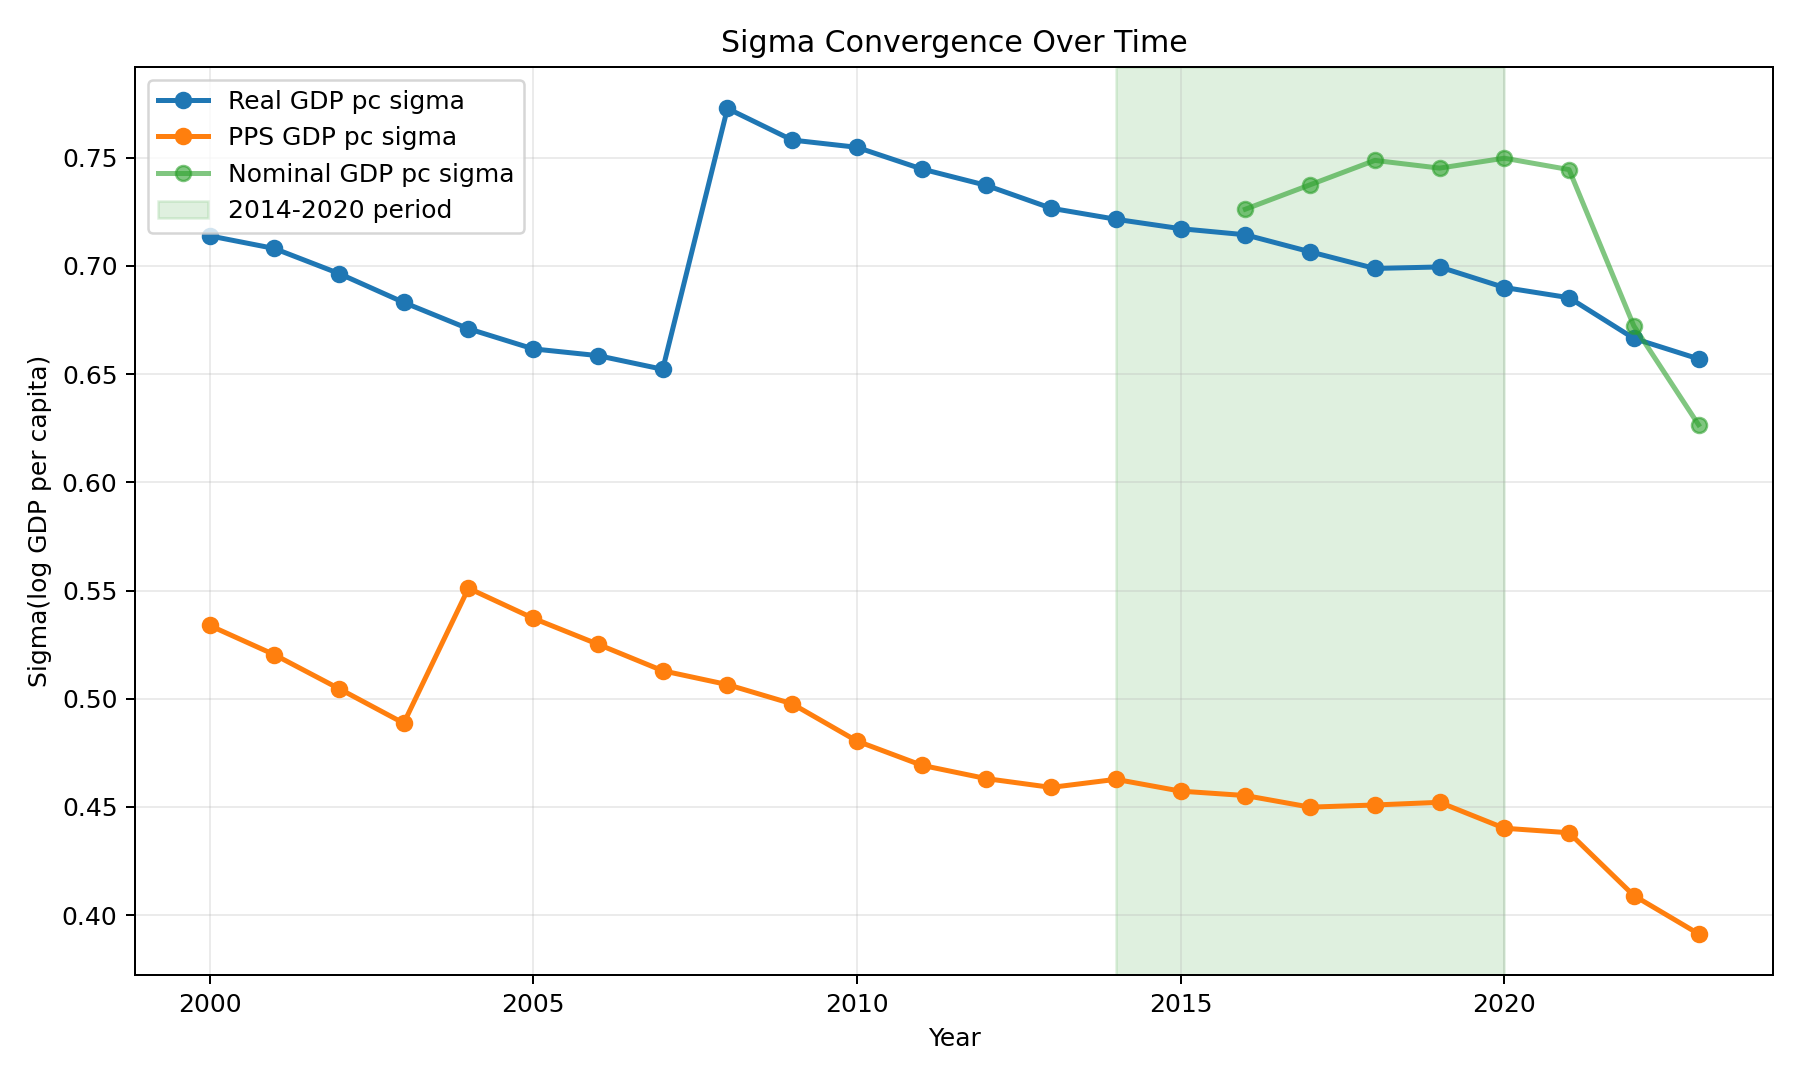

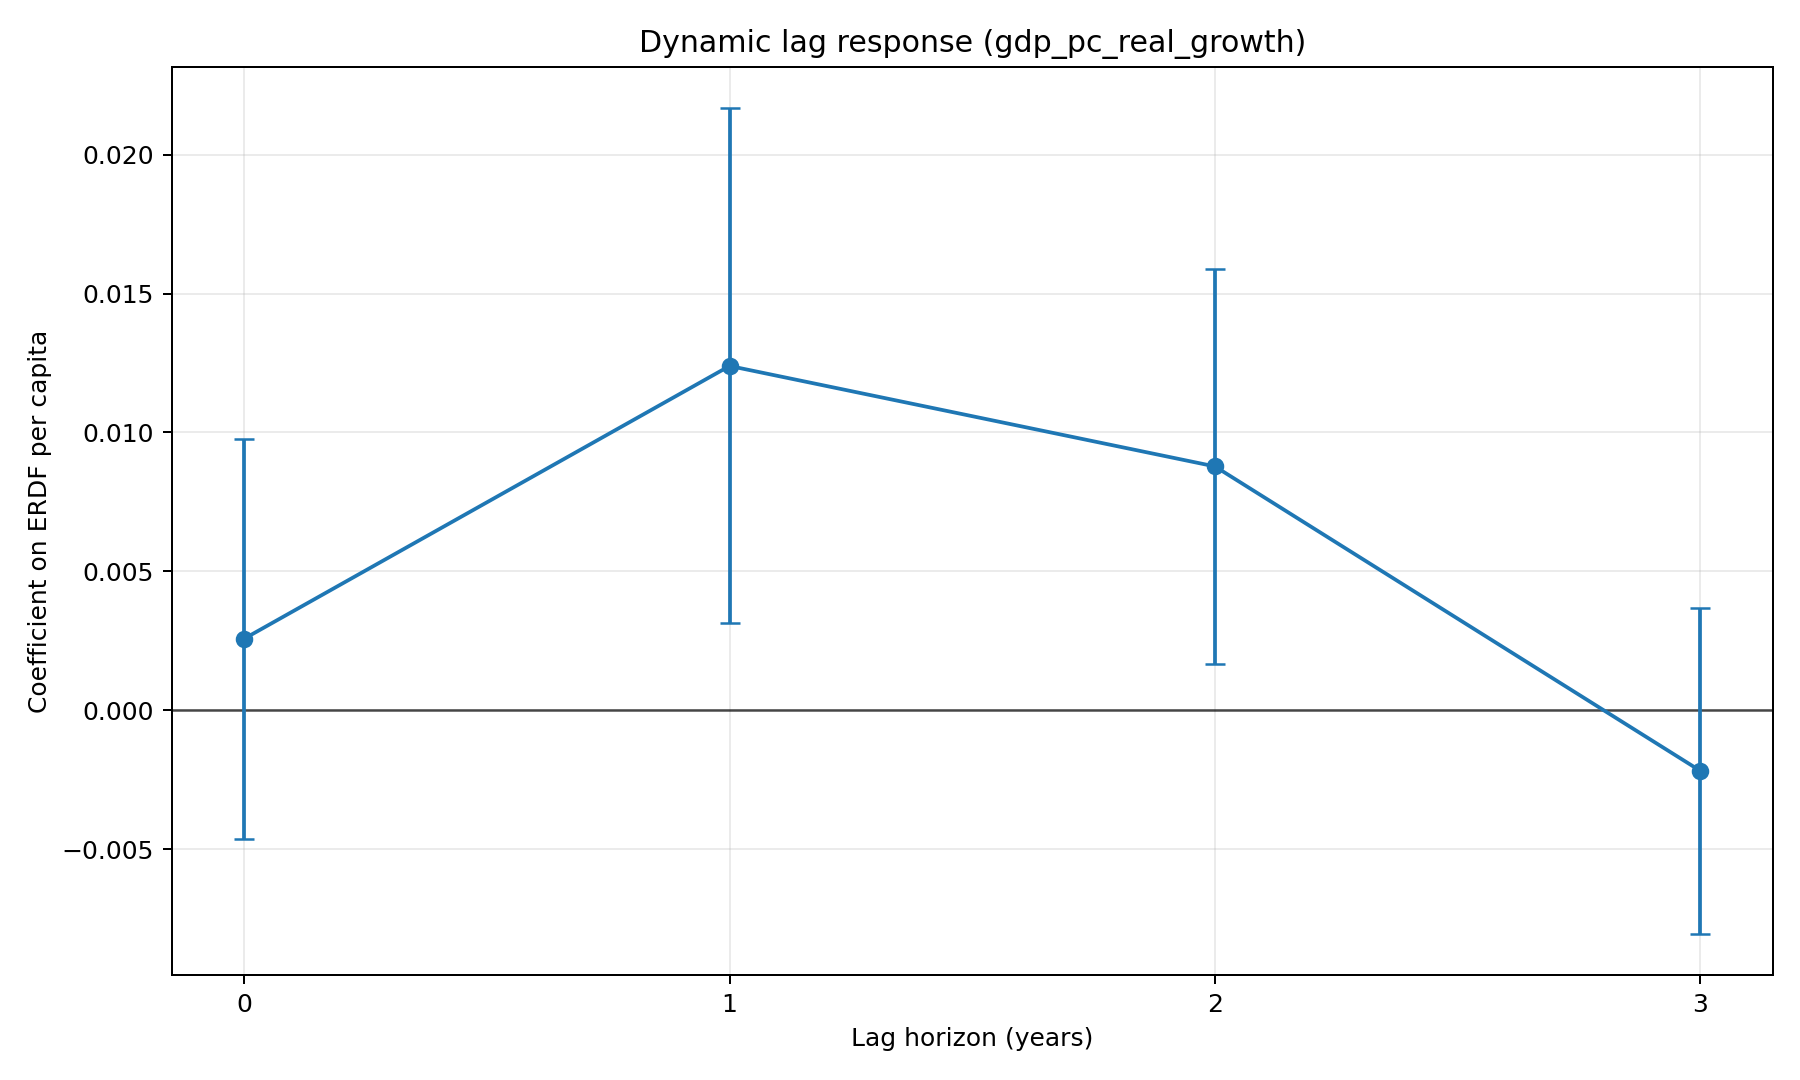

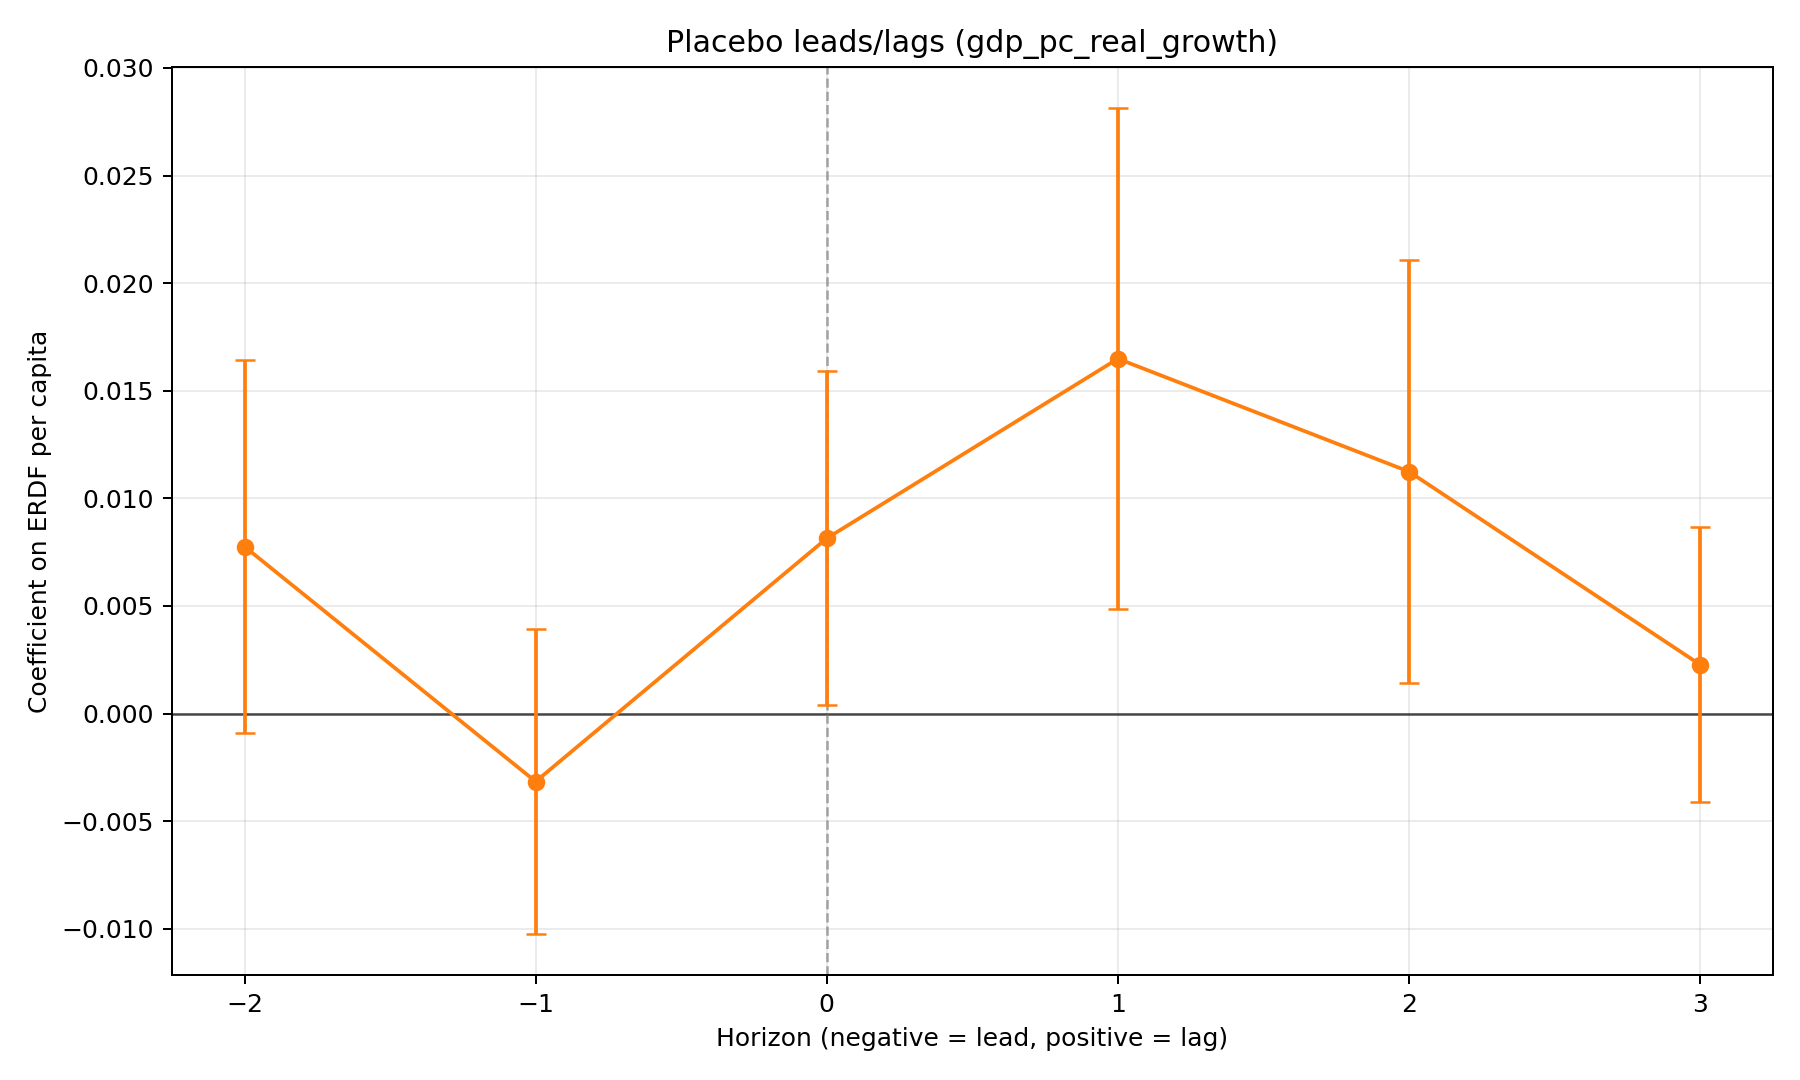

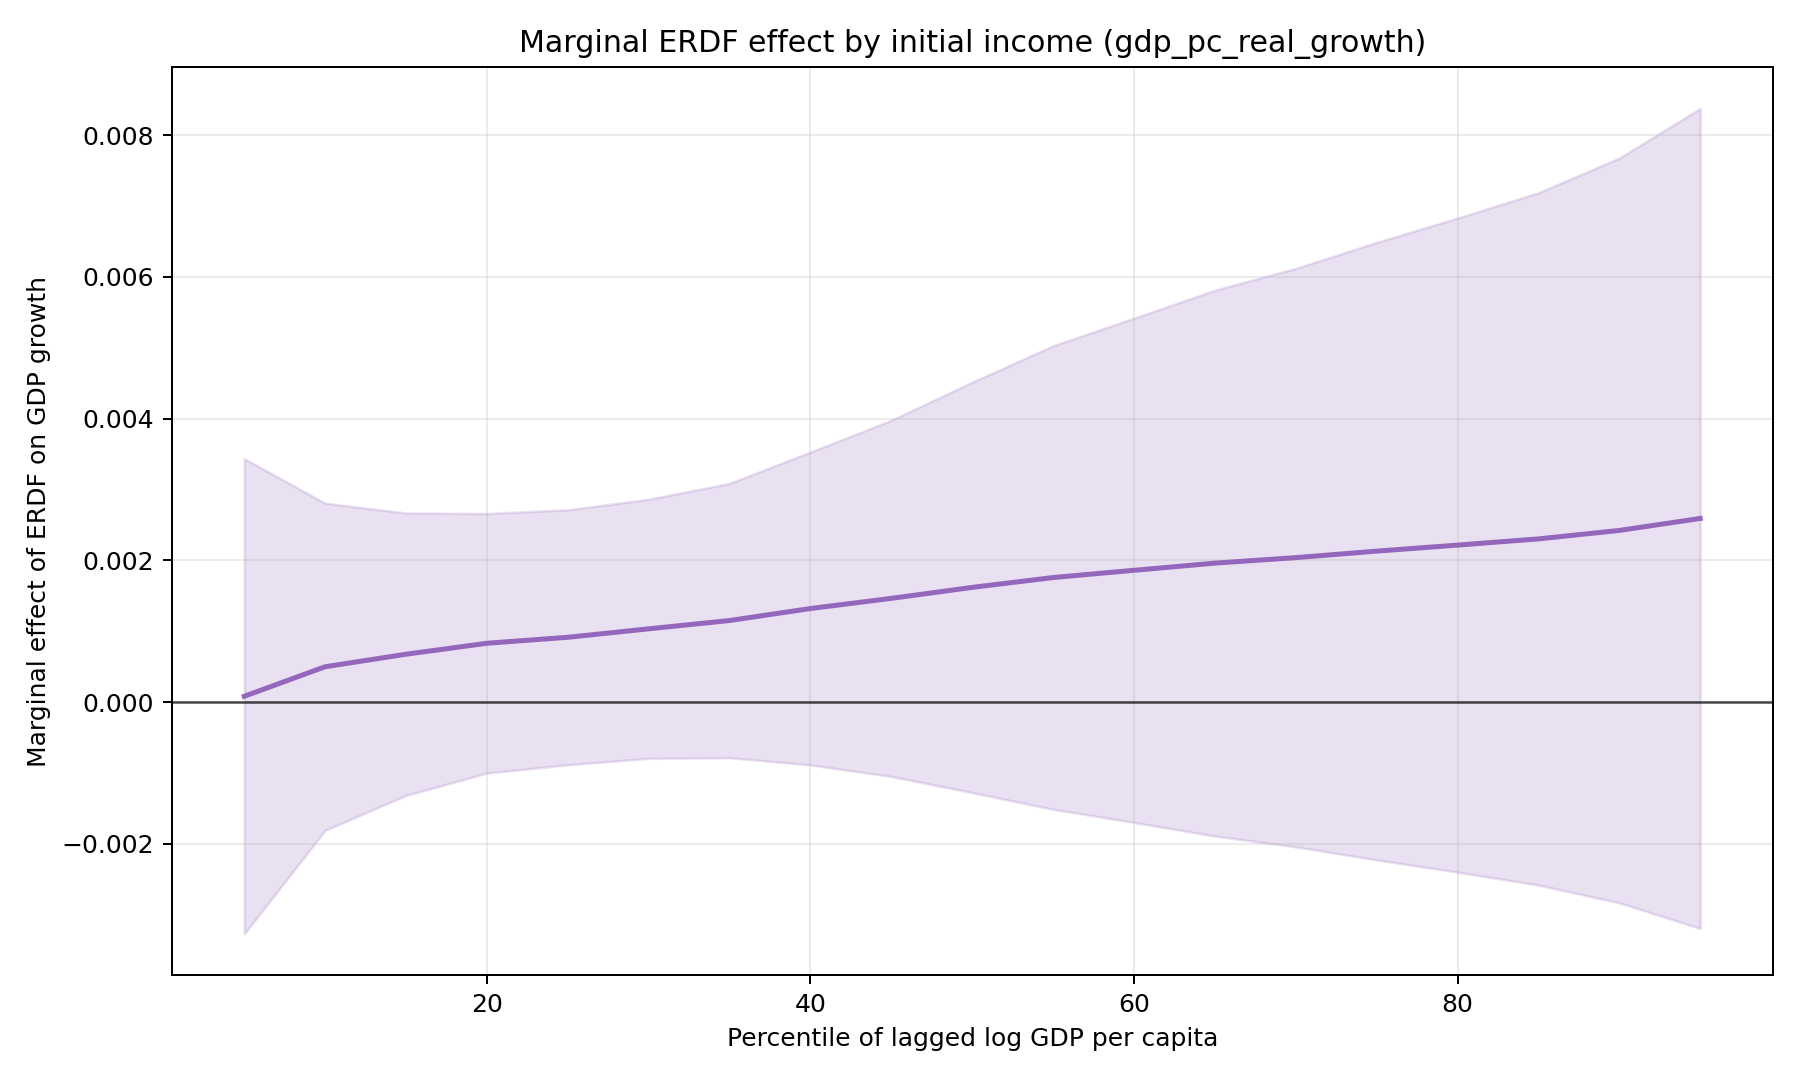

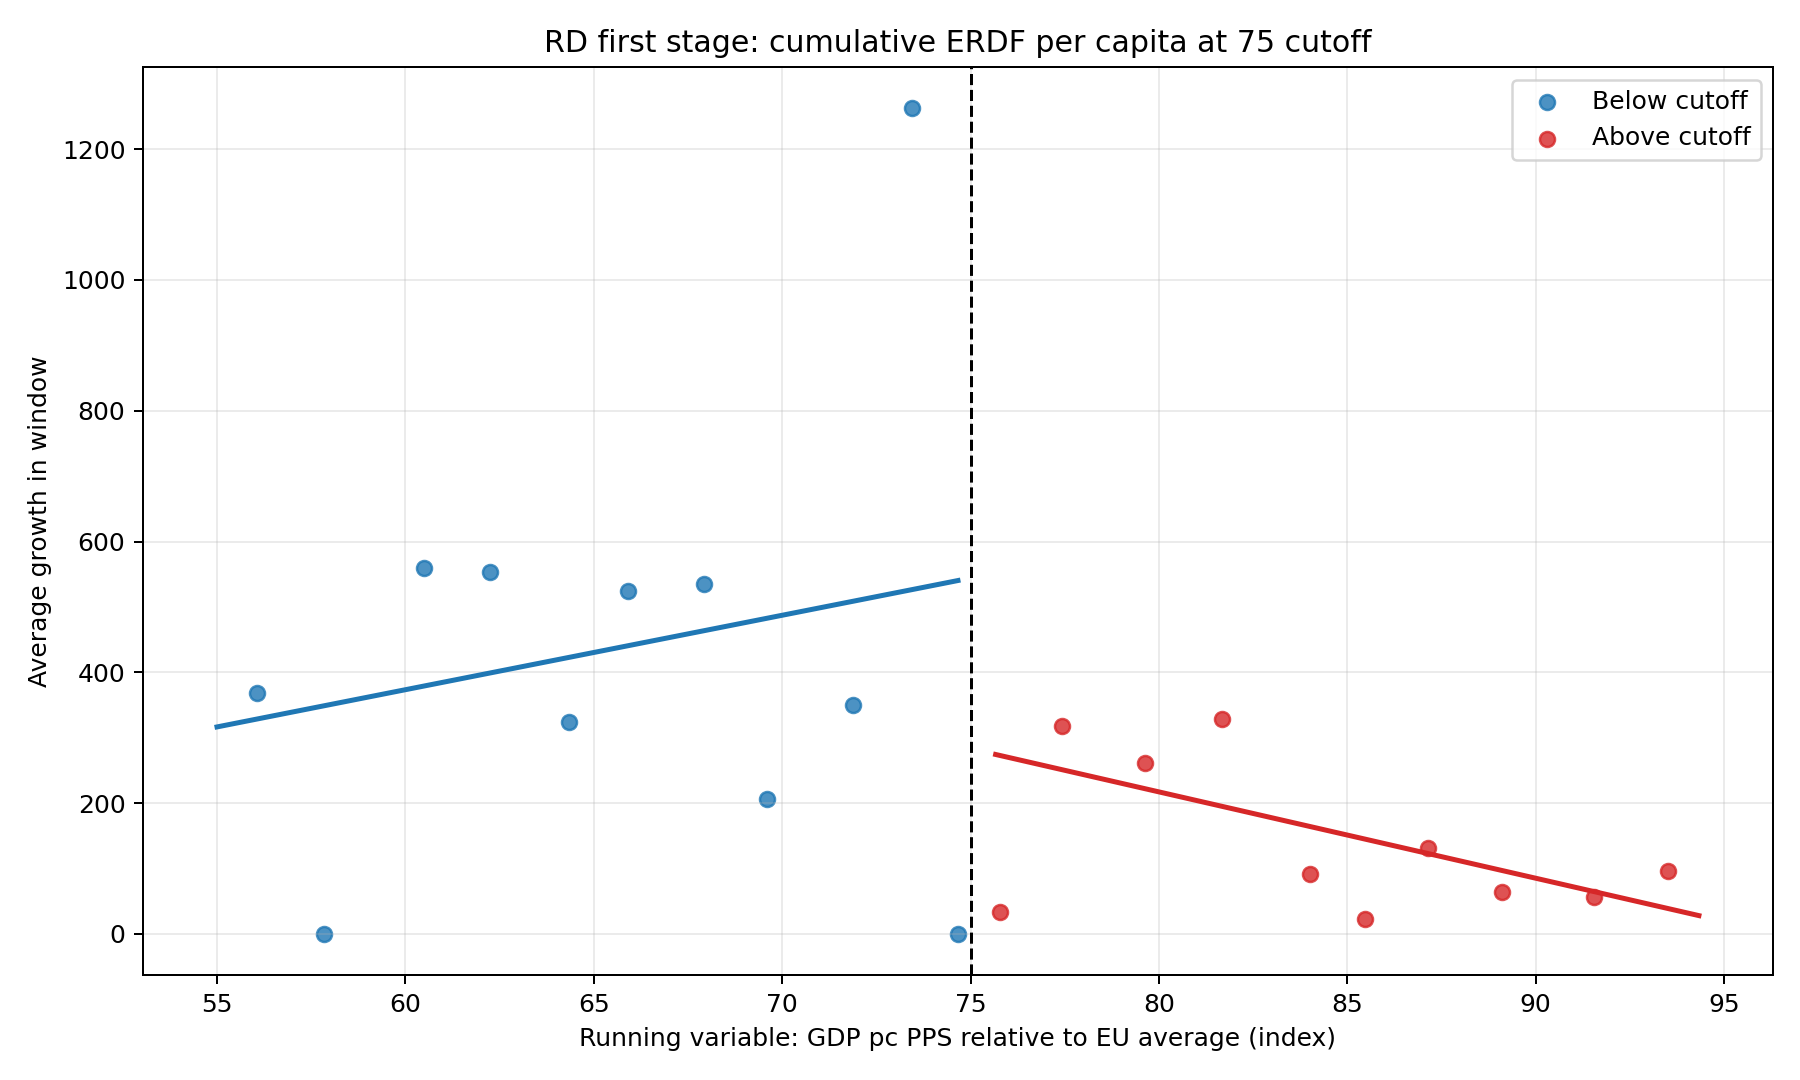

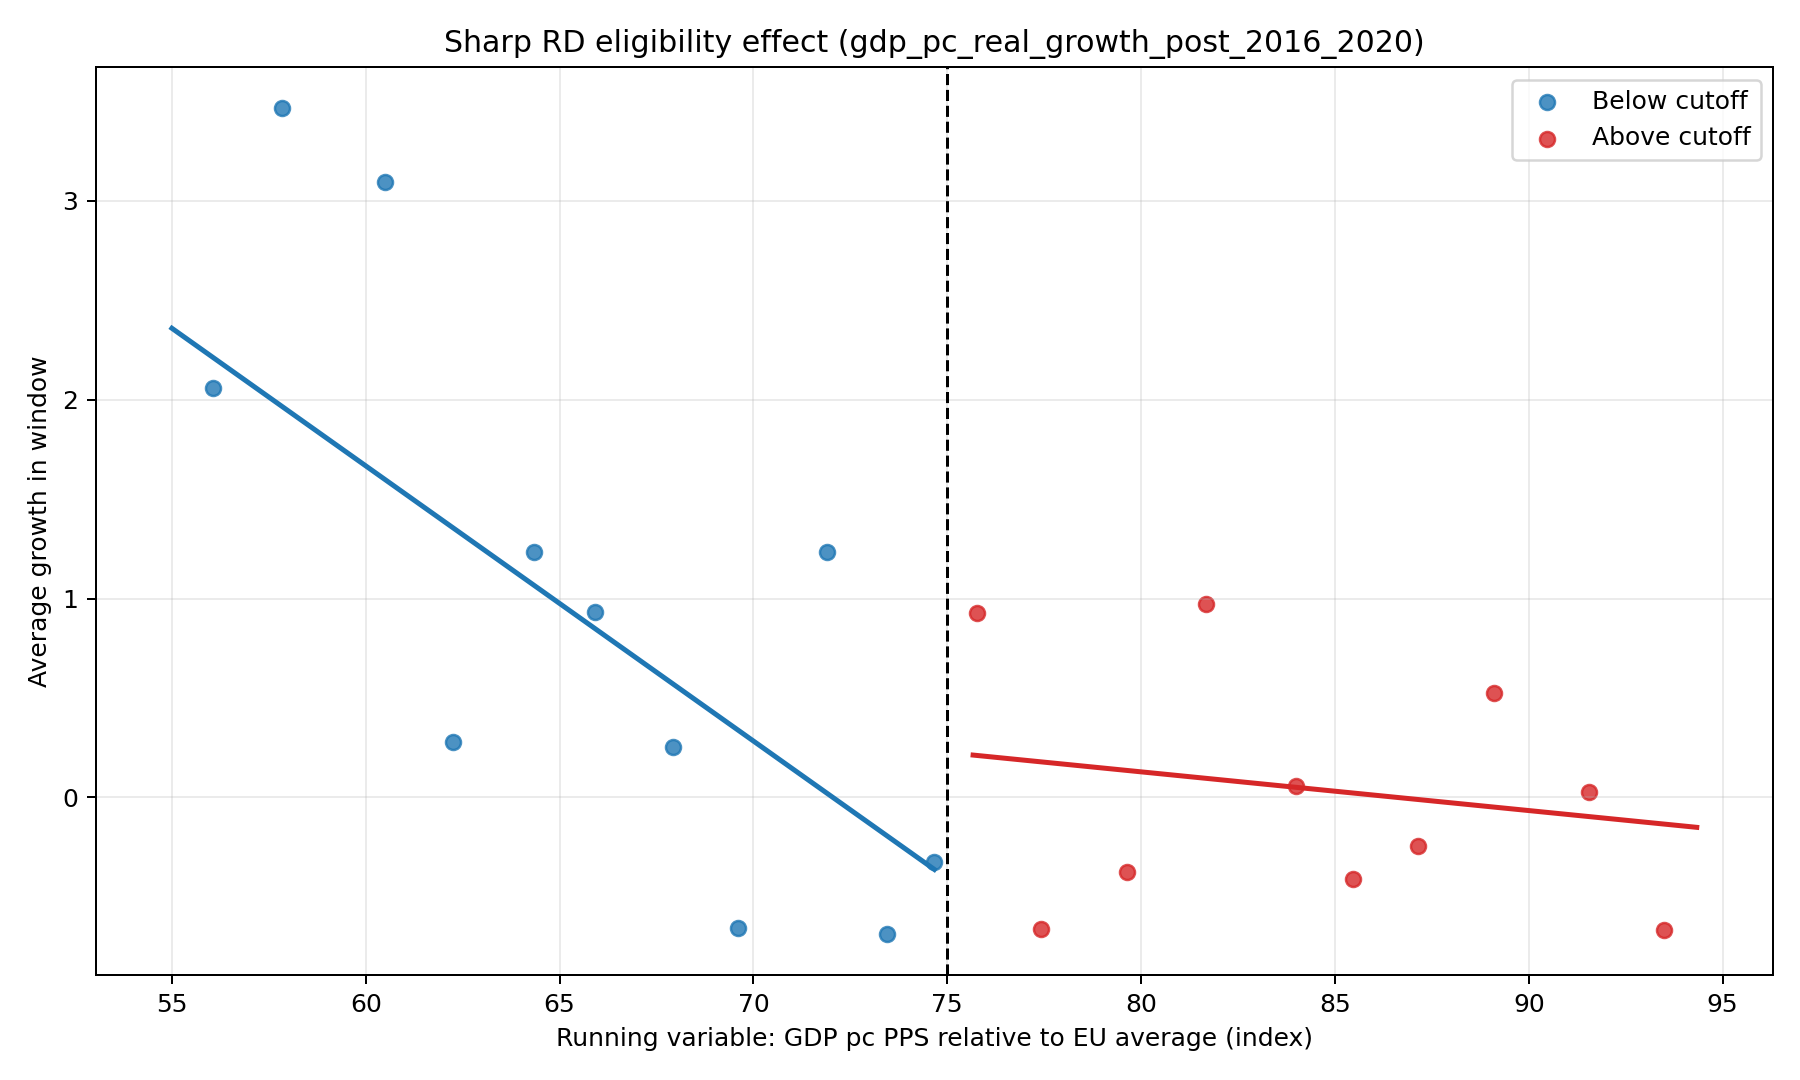

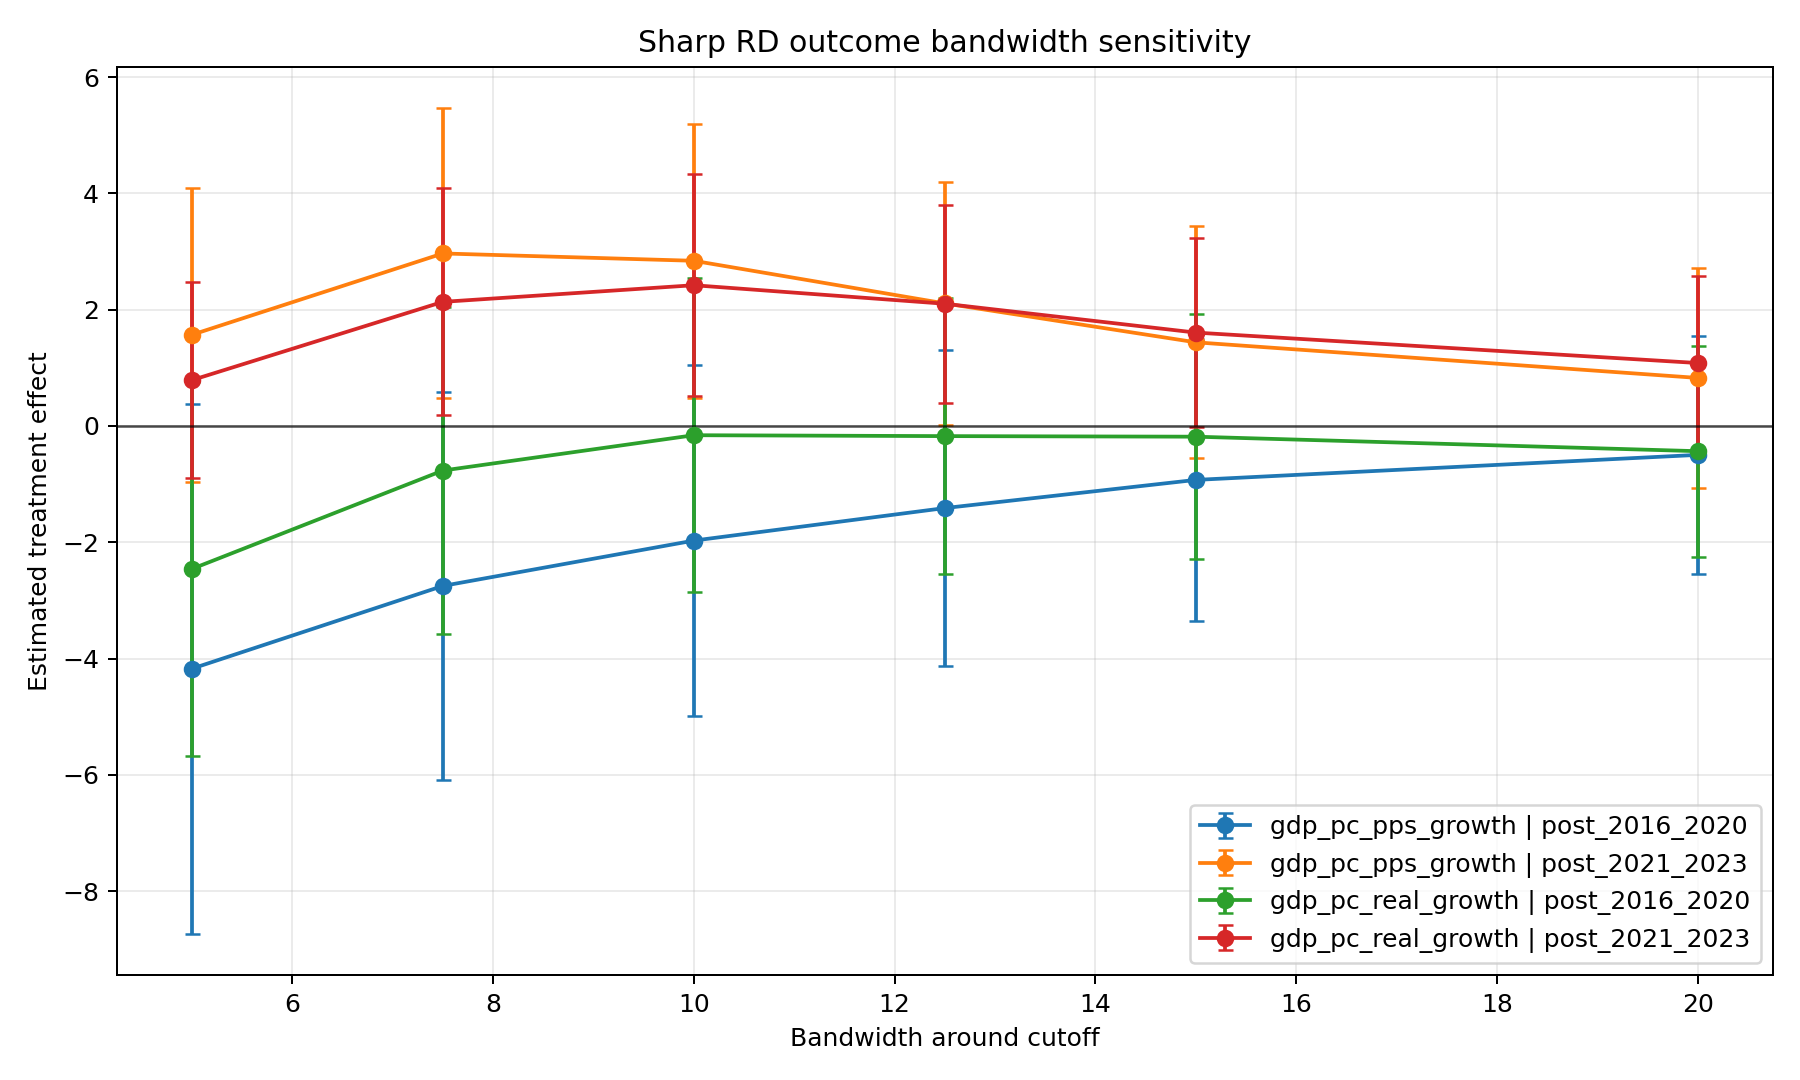

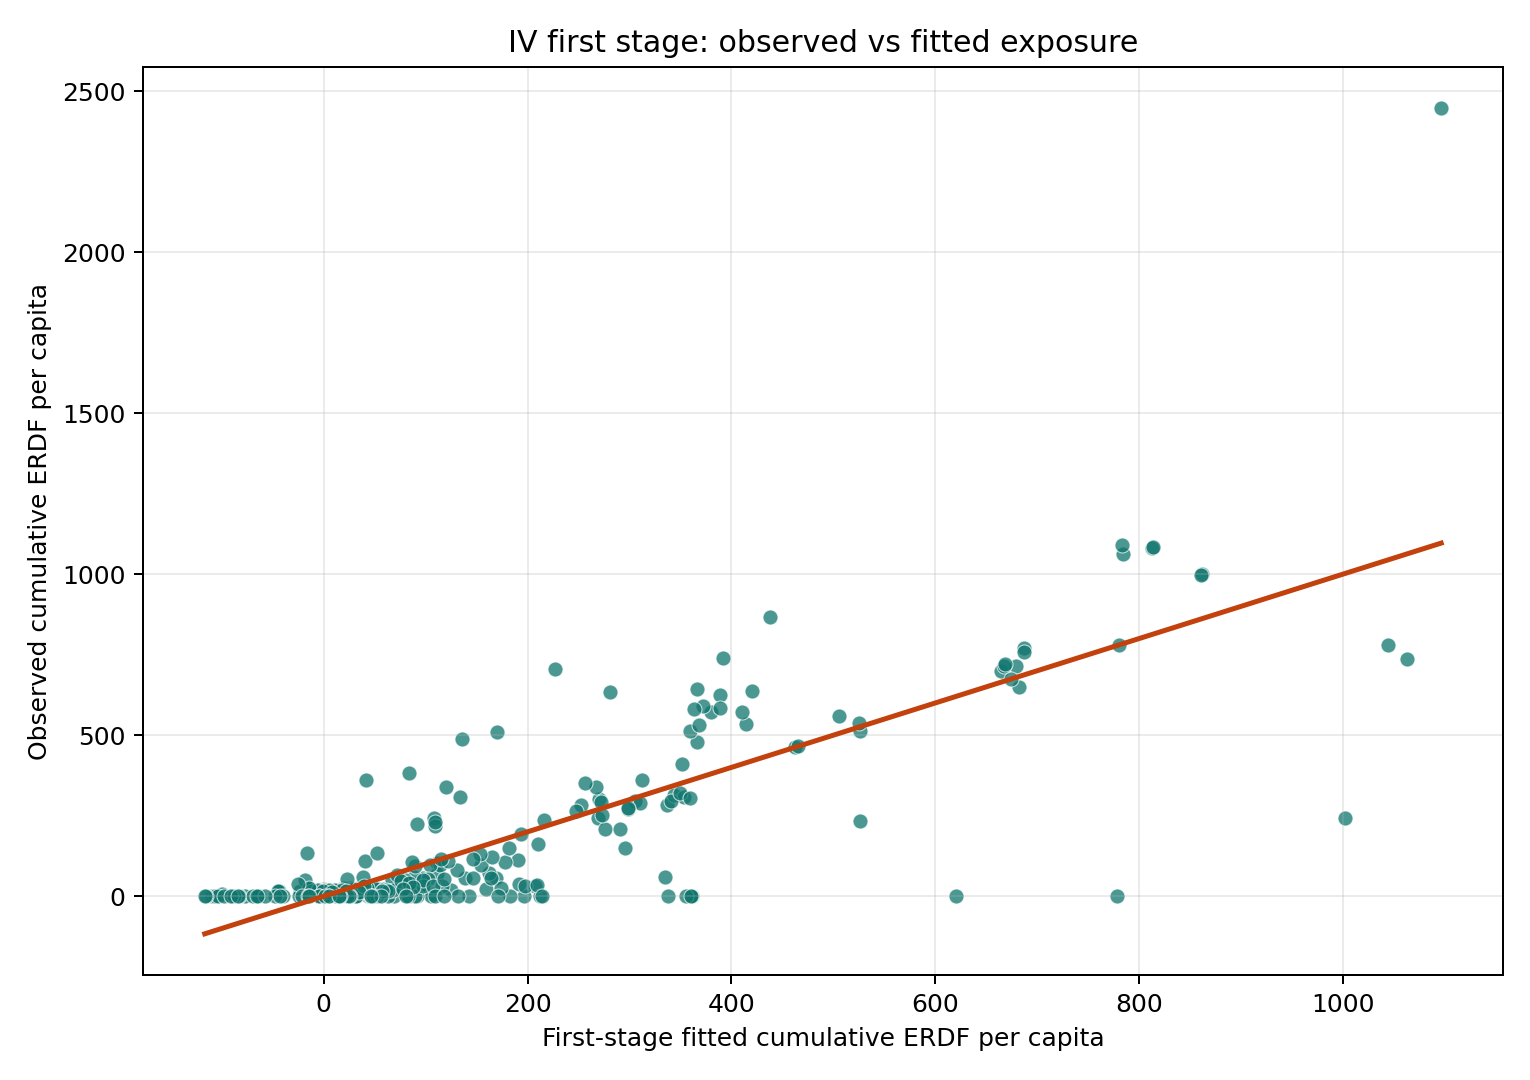

In [4]:
display(Image(filename=str(root / 'outputs/figures/sigma_convergence_v31.png')))
display(Image(filename=str(root / 'outputs/figures/dynamic_lag_response_v31.png')))
display(Image(filename=str(root / 'outputs/figures/leads_lags_placebo_v31.png')))
display(Image(filename=str(root / 'outputs/figures/beta_convergence_partial_v31.png')))
display(Image(filename=str(root / 'outputs/figures/rd_first_stage_funding_jump_v31.png')))
display(Image(filename=str(root / 'outputs/figures/rd_outcome_binned_scatter_v31.png')))
display(Image(filename=str(root / 'outputs/figures/rd_bandwidth_sensitivity_v31.png')))
display(Image(filename=str(root / 'outputs/figures/iv_first_stage_scatter_v31.png')))

## Limitations
- Real GDP per capita is reconstructed from NUTS2 volume index (2015=100) anchored to nominal per-capita levels.
- Eligibility categories are reconstructed from 2007-2009 PPS relative-to-EU thresholds.
- Category mapping is not available for all region-year rows due NUTS/code coverage changes.